In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stablediffusion3/keras/stable_diffusion_3_medium/3/clip_g_tokenizer.json
/kaggle/input/stablediffusion3/keras/stable_diffusion_3_medium/3/config.json
/kaggle/input/stablediffusion3/keras/stable_diffusion_3_medium/3/preprocessor.json
/kaggle/input/stablediffusion3/keras/stable_diffusion_3_medium/3/metadata.json
/kaggle/input/stablediffusion3/keras/stable_diffusion_3_medium/3/model.weights.h5
/kaggle/input/stablediffusion3/keras/stable_diffusion_3_medium/3/clip_g_preprocessor.json
/kaggle/input/stablediffusion3/keras/stable_diffusion_3_medium/3/clip_l_preprocessor.json
/kaggle/input/stablediffusion3/keras/stable_diffusion_3_medium/3/clip_l_tokenizer.json
/kaggle/input/stablediffusion3/keras/stable_diffusion_3_medium/3/assets/clip_l_tokenizer/merges.txt
/kaggle/input/stablediffusion3/keras/stable_diffusion_3_medium/3/assets/clip_l_tokenizer/vocabulary.json
/kaggle/input/stablediffusion3/keras/stable_diffusion_3_medium/3/assets/clip_g_tokenizer/merges.txt
/kaggle/input/stable

In [ ]:
!pip install -Uq keras
#Purpose: Installs or updates the Keras library to the latest version.
#Explanation:
#!: This is used in Jupyter Notebooks to run shell commands directly from a code cell.
#pip install: The command used to install Python packages.
#-U: Ensures that the latest version is installed (upgrades if an older version is present).
#-q: Suppresses most of the output, making the installation process less verbose.
#Keras is a popular deep learning library that provides a high-level neural network API.
!pip install -Uq git+https://github.com/keras-team/keras-hub.git
#Purpose: Installs or updates the Keras Hub package directly from the GitHub repository.
#Explanation:
#git+https://...: The package is being installed directly from a GitHub repository (instead of using the official PyPI index).
#keras-hub: A collection of Keras utilities for deploying pre-trained models and components related to Stable Diffusion and other advanced architectures.
#This specific package might contain experimental features that are not yet available in the standard Keras release.
!wget -O mountain_dog.png https://raw.githubusercontent.com/keras-team/keras-io/master/guides/img/stable_diffusion_3_in_keras_hub/mountain_dog.png
#Purpose: Downloads an image file (mountain_dog.png) from a specified URL and saves it locally.
#Explanation:
#wget: A command-line utility to download files from the internet.
#-O mountain_dog.png: Specifies that the downloaded file should be saved with the name mountain_dog.png.
#The URL points to an image hosted in the keras-io repository on GitHub.
#This image will be used for further processing, likely related to the Stable Diffusion model.
!wget -O mountain_dog_mask.png https://raw.githubusercontent.com/keras-team/keras-io/master/guides/img/stable_diffusion_3_in_keras_hub/mountain_dog_mask.png
#Purpose: Downloads a second file, mountain_dog_mask.png, which is usually a mask image corresponding to the previously downloaded image.
#Explanation:
#The mask image typically represents areas of interest (e.g., a region where you might want to apply a specific effect using image inpainting with Stable Diffusion).

--2024-11-10 15:18:04--  https://raw.githubusercontent.com/keras-team/keras-io/master/guides/img/stable_diffusion_3_in_keras_hub/mountain_dog.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1187310 (1.1M) [image/png]
Saving to: 'mountain_dog.png'

mountain_dog.png    100%[===================>]   1.13M  --.-KB/s    in 0.04s   

2024-11-10 15:18:04 (25.6 MB/s) - 'mountain_dog.png' saved [1187310/1187310]

--2024-11-10 15:18:05--  https://raw.githubusercontent.com/keras-team/keras-io/master/guides/img/stable_diffusion_3_in_keras_hub/mountain_dog_mask.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|

In [ ]:
import os

os.environ["KERAS_BACKEND"] = "jax"
#Purpose: Configures the Keras backend to use JAX before any other modules are loaded.
#Explanation:
#import os: Imports Python's built-in OS module, which provides tools to interact with the operating system, such as environment variables, file paths, and directories.
#os.environ: Represents a dictionary-like object in Python where you can access and modify environment variables.
#os.environ["KERAS_BACKEND"] = "jax":
#Sets an environment variable called KERAS_BACKEND to "jax".
#This tells Keras to use JAX as the backend library for running computations (instead of the default, which is typically TensorFlow).
#JAX is an optimized numerical computing library that offers high-performance automatic differentiation and supports hardware accelerators like GPUs and TPUs. It’s particularly useful for deep learning due to its speed and efficiency

import time
#Purpose: Imports Python's built-in time module.
#Explanation: Provides functions to measure and manipulate time, such as:
#time.time() - Get the current time in seconds since the Epoch (useful for measuring execution time).
#time.sleep(seconds) - Pause the program for a specified number of seconds.
import keras
import keras_hub
#Purpose: Loads the Keras library and Keras Hub module.
#Explanation:
#import keras: Imports the Keras deep learning library, which is widely used for building and training neural networks.
#import keras_hub: Imports a module called keras_hub, which you installed earlier from a GitHub repository.
#Keras Hub likely provides access to pre-trained models, utilities, or specific components designed for Stable Diffusion and other state-of-the-art techniques. It is not part of the standard Keras package but rather an extension that enhances Keras functionality.
import matplotlib.pyplot as plt
#Purpose: Loads the Matplotlib library's pyplot module.
#Explanation:
#Matplotlib is a popular Python library for creating plots and visualizations.
#pyplot is a submodule that allows you to create static, interactive, and animated visualizations (e.g., line plots, histograms, and image displays).
#In this context, it will likely be used to visualize results, such as displaying images generated or processed by your models.

import numpy as np
#Purpose: Loads the NumPy library.
#Explanation:
#NumPy is the fundamental package for scientific computing in Python.
#It provides support for arrays, matrices, and high-level mathematical functions to operate on these data structures.
#In machine learning and deep learning, numpy is often used for preprocessing data, handling image data as arrays, and performing numerical computations efficiently.
from PIL import Image
#Purpose: Imports the Image class from the PIL (Python Imaging Library) module.
#Explanation:
#PIL, or its modern fork Pillow, is a popular library for image processing.
#The Image class provides methods for opening, manipulating, and saving image files.
#Common use cases include resizing, cropping, rotating, converting image formats, and loading images into a format that can be fed into deep learning models.


In [ ]:

def display_generated_images(images):
    """Helper function to display the images from the inputs.

    This function accepts the following input formats:
    - 3D numpy array.
    - 4D numpy array: concatenated horizontally.
    - List of 3D numpy arrays: concatenated horizontally.
    """
#Purpose: A utility function to display images using Matplotlib.
#Docstring: Provides information on what the function does and the types of inputs it accepts:
#3D NumPy array: Represents a single image (shape: height x width x channels).
#4D NumPy array: Represents a batch of images (shape: batch_size x height x width x channels), which will be concatenated horizontally for display.
#List of 3D NumPy arrays: Each array represents an image, and the function will concatenate them horizontally for display

    display_image = None
#Step: Initializes display_image to None. This variable will store the image to be displayed.

    if isinstance(images, np.ndarray):
#Step: Checks if the input is a NumPy array.

        if images.ndim == 3:
#If images is a 3D array, it represents a single image (shape: height x width x channels).
#Converts the NumPy array into a PIL Image using Image.fromarray().

            display_image = Image.fromarray(images)
        elif images.ndim == 4:
            concated_images = np.concatenate(list(images), axis=1)
            display_image = Image.fromarray(concated_images)
#Step 1: Checks if the input images is a NumPy array.
#Step 2:
#If it's a 3D array (height x width x channels), it converts it into a PIL Image using Image.fromarray().
#If it's a 4D array (num_images x height x width x channels), it concatenates all images horizontally using np.concatenate() along axis=1 and then converts the result into a PIL Image.


    elif isinstance(images, list):
        concated_images = np.concatenate(images, axis=1)
        display_image = Image.fromarray(concated_images)
#Step: Checks if the input is a list of 3D NumPy arrays.
#Uses np.concatenate() to combine the images horizontally.
#Converts the concatenated result into a PIL Image.

    if display_image is None:
        raise ValueError("Unsupported input format.")
#Step: If none of the conditions above are met, raises a ValueError indicating that the input format is unsupported.
#
    plt.figure(figsize=(10, 10))
    plt.axis("off")
    plt.imshow(display_image)
    plt.show()
    plt.close()
#Step: Displays the image using Matplotlib.
#Creates a figure with a size of 10x10 inches.
#Hides the axes (plt.axis("off")).
#Uses plt.imshow() to display the image.
#Displays the image with plt.show() and then closes the plot (plt.close()) to free up memory.


backbone = keras_hub.models.StableDiffusion3Backbone.from_preset(
    "stable_diffusion_3_medium", image_shape=(512, 512, 3), dtype="float16"
)
#Purpose: Loads a pre-trained Stable Diffusion 3 Backbone model using Keras Hub.
#Explanation:
#keras_hub.models.StableDiffusion3Backbone.from_preset(...):
#Loads a pre-configured version of the Stable Diffusion model using the preset "stable_diffusion_3_medium".
#image_shape=(512, 512, 3) specifies that the model expects input images of size 512x512 pixels with 3 color channels (RGB).
#dtype="float16" indicates that the model uses 16-bit floating point precision, which improves performance and reduces memory usage, especially on GPUs.

preprocessor = keras_hub.models.StableDiffusion3TextToImagePreprocessor.from_preset(
    "stable_diffusion_3_medium"
)
#Purpose: Loads a pre-trained text-to-image preprocessor.
#Explanation:
#keras_hub.models.StableDiffusion3TextToImagePreprocessor.from_preset(...):
#Loads a pre-trained text processing component using the preset "stable_diffusion_3_medium".
#This preprocessor is responsible for converting text prompts into a format that the Stable Diffusion model can use.

text_to_image = keras_hub.models.StableDiffusion3TextToImage(backbone, preprocessor)
#Purpose: Creates a complete text-to-image generation pipeline using the backbone model and preprocessor.
#Explanation:
#keras_hub.models.StableDiffusion3TextToImage(...):
#Combines the backbone (which handles the model architecture) with the preprocessor (which processes text inputs).
#This pipeline allows generating images directly from text descriptions.

#
#

In [ ]:
prompt = "Astronaut in a jungle, cold color palette, muted colors, detailed, 8k"

# When using JAX or TensorFlow backends, you might experience a significant
# compilation time during the first `generate()` call. The subsequent
# `generate()` call speedup highlights the power of JIT compilation and caching
# in frameworks like JAX and TensorFlow, making them well-suited for
# high-performance deep learning tasks like image generation.
generated_image = text_to_image.generate(prompt)
#Purpose: Uses the Stable Diffusion model to generate an image based on the provided text prompt.
#Explanation:
#text_to_image.generate(prompt):
#This method takes the text prompt defined earlier and generates an image using the Stable Diffusion pipeline.
#The generate() method uses the pre-trained backbone model and preprocessor (set up in the previous code) to convert the text description into a visual representation.
#The result is stored in the variable generated_image.
#The output will typically be in the form of a NumPy array representing the generated image.
#
#
display_generated_images(generated_image)
#Purpose: Displays the generated image using the display_generated_images() function defined earlier.
#Explanation:
#Passes the generated_image (which is likely a 3D or 4D NumPy array) to the display_generated_images() function.
#This function:
#Converts the NumPy array into a PIL Image.
#Uses Matplotlib to display the image without axes.
#Handles both single images and batches of images by concatenating them if needed.
#
#
#

In [ ]:

generated_images = text_to_image.generate([prompt] * 3)
#Purpose: Generates three images using the Stable Diffusion model based on the same text prompt.
#Explanation:
#[prompt] * 3:
#Creates a list with the text prompt repeated three times: ["Astronaut in a jungle, cold color palette, muted colors, detailed, 8k", "Astronaut in a jungle, cold color palette, muted colors, detailed, 8k", "Astronaut in a jungle, cold color palette, muted colors, detailed, 8k"].
#This means the model will generate three images, each using the same prompt.
#text_to_image.generate():
#This method can accept a list of prompts as input and will generate one image for each prompt in the list.
#Since the prompt is repeated three times, it will generate a batch of three images based on the same description.
#The output, generated_images, is likely a 4D NumPy array with shape (3, height, width, channels):
#3: The batch size (number of images).
#height, width, channels: The dimensions of each image (e.g., 512x512x3 for RGB images).

#
#
#
display_generated_images(generated_images)
#Purpose: Displays the generated images using the display_generated_images() function.
#Explanation:
#Passes the batch of generated images (generated_images) to the function.
#Inside display_generated_images():
#Since generated_images is a 4D array with shape (3, height, width, channels), the function will concatenate the images horizontally using np.concatenate() along axis=1.
#Converts the concatenated result into a PIL Image.
#Displays the combined image using Matplotlib.
#
#
#

Cost time (`num_steps=10`): 5.88s
Cost time (`num_steps=28`): 15.28s
Cost time (`num_steps=50`): 26.84s


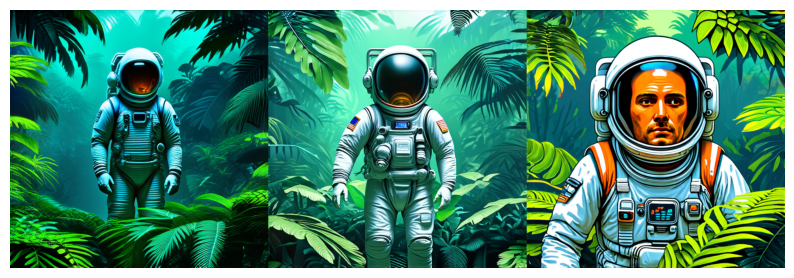

In [ ]:
num_steps = [10, 28, 50]
#Purpose: Defines a list containing different values for the num_steps parameter.
#Explanation:
#The values [10, 28, 50] represent the number of diffusion steps that will be used for generating images.
#num_steps: This parameter controls the number of iterations the model performs during the denoising process.
#Fewer steps (e.g., 10): Faster generation but potentially lower-quality images with less detail.
#More steps (e.g., 50): Slower generation but potentially higher-quality images with more detail.

generated_images = []
#Purpose: Creates an empty list to store the images generated using different num_steps values.

for n in num_steps:
#Purpose: Iterates over the list num_steps to generate an image for each value of n.

    st = time.time()
#Purpose: Captures the start time before generating an image.
#Explanation:
#time.time() returns the current time in seconds since the epoch. This is used to measure how long it takes to generate each image.

    generated_images.append(text_to_image.generate(prompt, num_steps=n))
 #Purpose: Generates an image using the current value of n for num_steps and adds it to the generated_images list.
#Explanation:
#text_to_image.generate(prompt, num_steps=n):
#Generates an image using the specified prompt ("Astronaut in a jungle, cold color palette, muted colors, detailed, 8k") and the given num_steps value.
#The higher the num_steps, the longer it takes, but the output quality may be better.
#generated_images.append(...) stores the generated image in the list generated_images.


    print(f"Cost time (`num_steps={n}`): {time.time() - st:.2f}s")
#Purpose: Prints the time taken to generate the image for the current num_steps.
#Explanation:
#time.time() - st computes the time difference between the current time and the start time st.
#The :.2f format ensures that the time is displayed with two decimal places.
#This provides feedback on how the number of steps affects the time required to generate an image.
#
#
#
display_generated_images(generated_images)
#Purpose: Displays all the generated images side by side.
#Explanation:
#Passes the generated_images list to the display_generated_images() function.
#The function will concatenate the images horizontally and display them using Matplotlib.



In [ ]:
generated_images = text_to_image.generate(
    {
        "prompts": [prompt] * 3,
        "negative_prompts": ["Green color"] * 3,
    }
)
#Explanation:
#Purpose:

#Generates a batch of images using the Stable Diffusion model with both positive prompts and negative prompts.
#The negative prompt is used to discourage certain features from appearing in the generated image.
#Detailed Breakdown:

#text_to_image.generate(...):
#The generate() method now accepts a dictionary containing both prompts and negative_prompts.
#"prompts": [prompt] * 3:
#[prompt] * 3 creates a list where the prompt is repeated three times, i.e., ["Astronaut in a jungle, cold color palette, muted colors, detailed, 8k", ...].
#This tells the model to generate three images based on the same text description.
#"negative_prompts": ["Green color"] * 3:
#["Green color"] * 3 creates a list where the negative prompt is repeated three times.
#This tells the model to avoid generating green colors in the images.
#The output is stored in the variable generated_images, which will be a 4D NumPy array with shape (3, height, width, channels):
#3: Number of images generated.
#height, width, channels: Dimensions of each image (e.g., 512x512x3 for RGB).
#How Positive and Negative Prompts Work:
#Positive Prompt (prompts): Guides the AI to include specific elements in the generated image.
#Negative Prompt (negative_prompts): Instructs the model to exclude or reduce the presence of certain features, like colors, objects, or styles.
#Example in this case:
#Positive: "Astronaut in a jungle, cold color palette, muted colors, detailed, 8k".
#Negative: "Green color" discourages the use of green tones, despite the jungle setting.
#
#
#
#

display_generated_images(generated_images)
#Purpose: Uses the display_generated_images() function to display all three generated images.
#How it works:
#The generated_images array, which contains three images, is passed to display_generated_images().
#The function handles the 4D array:
#Concatenates the images horizontally.
#Converts the result into a PIL Image.
#Displays the combined image using Matplotlib.



In [ ]:
generated_images = [
    text_to_image.generate(prompt, guidance_scale=2.5),
    text_to_image.generate(prompt, guidance_scale=7.0),
    text_to_image.generate(prompt, guidance_scale=10.5),
]
#Explanation:
#Purpose:

#Generates three images, each with a different value for the guidance_scale parameter.
#The guidance_scale parameter determines how much emphasis the model places on the text prompt when generating the image.
#Detailed Breakdown:

t#ext_to_image.generate(prompt, guidance_scale=2.5):
#The first image is generated with a guidance scale of 2.5, which applies a relatively low emphasis on the prompt.
#text_to_image.generate(prompt, guidance_scale=7.0):
#The second image uses a higher guidance scale of 7.0, meaning the model will focus more on adhering to the prompt’s details.
#text_to_image.generate(prompt, guidance_scale=10.5):
#The third image is generated with an even higher guidance scale of 10.5, pushing the model to follow the prompt as closely as possible.
#What is guidance_scale?

#This parameter, often called "classifier-free guidance scale", controls the balance between creativity and adherence to the prompt:
#Lower values (e.g., 2.5): The model has more creative freedom, potentially resulting in images that are loosely related to the prompt.
#Higher values (e.g., 10.5): The model strictly follows the text prompt, producing images that are more likely to match the specified content but may be less diverse.
#It's a trade-off:
#Low guidance might generate more abstract or artistic interpretations.
#High guidance focuses on fidelity to the prompt but may reduce variability or introduce artifacts.
#Result:

#The generated_images variable holds a list of three images, each generated with different levels of prompt adherence.
display_generated_images(generated_images)
#Purpose: Displays all the generated images side by side using the display_generated_images() function.
#How it works:
#The function takes the list of generated images and processes them for visualization.
#Since the images are stored in a list, the function:
#Concatenates them horizontally.
#Converts the result into a PIL Image.
#Displays the combined image using Matplotlib.
#
#
#

In [ ]:
image_to_image = keras_hub.models.StableDiffusion3ImageToImage(backbone, preprocessor)
#Purpose: Initializes the image-to-image model using the previously loaded backbone and preprocessor for Stable Diffusion.
#Explanation:
#backbone: This is the core part of the model, which handles the main diffusion process.
#preprocessor: This is responsible for preprocessing the input images and prompts to make them compatible with the model.
#StableDiffusion3ImageToImage: A specific model for generating new images based on an existing image and a text prompt. The model uses both the input image and the prompt to create a new output image.


image = Image.open("mountain_dog.png").convert("RGB")

image = image.resize((512, 512))
width, height = image.size
#Purpose: Loads an image ("mountain_dog.png") and preprocesses it.
#Explanation:
#Image.open("mountain_dog.png"): Loads the image from the file path.
#.convert("RGB"): Converts the image to RGB mode, ensuring it's in a format compatible with the model.
#.resize((512, 512)): Resizes the image to 512x512 pixels, which is a standard size for Stable Diffusion models. This ensures that the input image has the correct dimensions for the model.
#width, height = image.size: Stores the original dimensions of the image in width and height, though this information isn’t used later in the code.
#
# Note that the values of the image must be in the range of [-1.0, 1.0].
rescale = keras.layers.Rescaling(scale=1 / 127.5, offset=-1.0)
image_array = rescale(np.array(image))
#Purpose: Rescales the image data to be in the range [-1.0, 1.0], which is the expected input format for many machine learning models.
#Explanation:
#keras.layers.Rescaling(scale=1 / 127.5, offset=-1.0): This layer rescales the image values from the range [0, 255] (common for RGB images) to the range [-1.0, 1.0]:
#Scaling by 1 / 127.5: Divides each pixel value by 127.5, so the range is now [0, 2].
#Offsetting by -1.0: Subtracts 1.0 from each pixel value, making the final range [-1.0, 1.0].
#np.array(image): Converts the image to a NumPy array for processing.
#image_array: The resulting array is now ready to be passed to the model.
#
#
#
#
prompt = "dog wizard, gandalf, lord of the rings, detailed, fantasy, cute, "
prompt += "adorable, Pixar, Disney, 8k"
#Purpose: Defines the text prompt that will guide the image generation.
#Explanation:
#The prompt describes the type of image to generate.
#It specifies a fantasy theme ("dog wizard, Gandalf, Lord of the Rings") with a cute, detailed style similar to Pixar or Disney animation, and in 8k resolution.
#
#
#
generated_image = image_to_image.generate(
    {
        "images": image_array,
        "prompts": prompt,
    }
)
#Purpose: Generates a new image using the image_to_image model.
#Explanation:
#image_to_image.generate({...}): The generate function is used to create the new image based on the provided input data:
#"images": image_array: Provides the rescaled input image that the model will modify.
#"prompts": prompt: Provides the text prompt that guides the transformation of the input image. The model will generate an image based on the input image while incorporating the details from the prompt.
#generated_image: This is the output image generated by the model, which combines elements from the input image and the text prompt.


display_generated_images(
    [
        np.array(image),
        generated_image,
    ]
)
#Purpose: Displays the original input image alongside the generated image.
#Explanation:
#np.array(image): Converts the original image to a NumPy array format for display.
#generated_image: Uses the image generated by the model.
#display_generated_images([...]): The function concatenates the original and generated images side by side and displays them using Matplotlib.
#
#
#

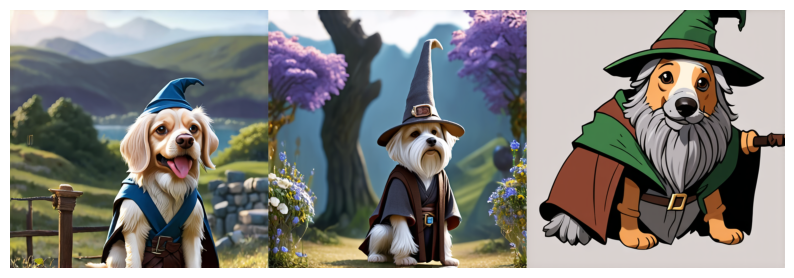

In [ ]:
generated_images = [
    image_to_image.generate(
        {
            "images": image_array,
            "prompts": prompt,
        },
        strength=0.7,
    ),
    image_to_image.generate(
        {
            "images": image_array,
            "prompts": prompt,
        },
        strength=0.8,
    ),
    image_to_image.generate(
        {
            "images": image_array,
            "prompts": prompt,
        },
        strength=0.9,
    ),
]
#Purpose: This code generates three image-to-image transformations using the image_to_image model. Each transformation uses the same input image (image_array) and prompt (prompt) but applies different strength values to control the extent to which the generated images are influenced by the original image versus the prompt.

#Detailed Explanation:

#List Definition:

#The generated_images list contains three elements, each of which is the result of a generate() function call.
#image_to_image.generate({...}):

#This function call generates a new image based on the input image (image_array) and the prompt (prompt).
#The model uses the image-to-image technique, where the input image is transformed to match the style and content described by the prompt.
#Input Data:

#"images": image_array: Passes the input image (which has already been processed into an array) to the model.
#"prompts": prompt: Passes the textual prompt to guide the image generation.
#strength Parameter:

#strength=0.7: The model will give moderate weight to the input image and will allow the prompt to influence the output, but not drastically change the input image.
#strength=0.8: The model will put a bit more emphasis on keeping the original input image intact, but still allow the prompt to influence the result.
#strength=0.9: The model will place greater weight on the input image, preserving more of the original content, with only subtle modifications to match the prompt.
#Overall Impact of strength:

#The lower the strength, the more creative and abstract the output will be, with the prompt having a larger influence.
#The higher the strength, the more closely the generated image will resemble the original image, with the prompt’s influence being more subtle.
#
#
#
#
display_generated_images(generated_images)
#Breakdown:
#Purpose: This line of code calls the display_generated_images() function, which is responsible for displaying the generated images.

#How It Works:

#The generated_images list, which contains the three images generated with different strength values, is passed to this function.
#The display_generated_images() function likely:
#Takes the list of images and concatenates them horizontally or vertically for comparison.
#Converts the images into a PIL Image format, which can be displayed.
#Uses Matplotlib or another visualization library to show the images.
#The result will be a side-by-side display of the three images, allowing you to visually compare the effect of different strength values on the image generation process.
#

In [ ]:
inpaint = keras_hub.models.StableDiffusion3Inpaint(backbone, preprocessor)
#Purpose: This initializes the StableDiffusion3Inpaint model from Keras Hub.
#Explanation:
#StableDiffusion3Inpaint: This model is designed for inpainting tasks, where it modifies specific areas of an image based on a given mask. Inpainting is often used to fill missing or specified parts of an image with new content, influenced by a textual prompt.
#backbone and preprocessor: These are previously defined components that provide the base model and preprocessing steps for the inpainting operation.

image = Image.open("mountain_dog.png").convert("RGB")
image = image.resize((512, 512))
image_array = rescale(np.array(image))
#Purpose: These lines load the input image, resize it, and apply a rescaling operation.
#Detailed Explanation:
#Image.open("mountain_dog.png").convert("RGB"): This loads the image mountain_dog.png and converts it to RGB format (in case it's in another mode like grayscale).
#image.resize((512, 512)): The image is resized to a fixed 512x512 resolution, which is the required input size for the inpainting model.
#rescale(np.array(image)): The image is converted into a NumPy array and then rescaled using a previously defined rescaling layer. This transformation scales the pixel values to a range between [-1.0, 1.0], which is  necessary for the model to process the image correctly.
#
#
# Note that the mask values are of boolean dtype.
mask = Image.open("mountain_dog_mask.png").convert("L")
mask = mask.resize((512, 512))
mask_array = np.array(mask).astype("bool")
#Purpose: These lines load the mask image, resize it, and convert it to a boolean array.
#Detailed Explanation:
#Image.open("mountain_dog_mask.png").convert("L"): This loads the mask image (mountain_dog_mask.png) and converts it to grayscale (L mode). The mask image will define which regions of the original image are to be modified.
#mask.resize((512, 512)): The mask is resized to the same 512x512 resolution as the input image.
#np.array(mask).astype("bool"): The mask image is converted into a NumPy array and then cast to a boolean type, where True represents the areas to be modified and False represents the untouched areas.
#
#

prompt = "a black cat with glowing eyes, cute, adorable, disney, pixar, highly "
prompt += "detailed, 8k"
#Purpose: This defines the text prompt that will guide the model in modifying the masked area.
#Explanation:
#The prompt describes a black cat with glowing eyes, using terms like "cute", "adorable", and "highly detailed". This prompt will influence how the model fills in the masked region of the image.
#The model will attempt to generate details for the masked area that match the description in the prompt.

#
generated_image = inpaint.generate(
    {
        "images": image_array,
        "masks": mask_array,
        "prompts": prompt,
    }
)
#Purpose: This line generates the inpainted image using the inpaint model.
#Detailed Explanation:
#inpaint.generate({...}): The generate() function is called on the inpainting model, and the following parameters are passed:
#"images": image_array: The original image (as a NumPy array) is passed to the model.
#"masks": mask_array: The mask (as a boolean NumPy array) is passed to indicate which parts of the image the model should modify.
#"prompts": prompt: The text prompt is provided to guide the model’s modifications to the masked area.
#The inpainting model will use the mask to identify the areas to modify and then generate content for those areas that aligns with the provided prompt.
#
#
#
display_generated_images(
    [
        np.array(image),
        np.array(mask.convert("RGB")),
        generated_image,
    ]
)
#Purpose: This line displays the original image, the mask, and the inpainted result side by side.
#Explanation:
#np.array(image): The original input image (converted to a NumPy array) is prepared for display.

#np.array(mask.convert("RGB")): The mask is converted back to RGB format (to make it visible, as it’s originally grayscale) and then converted into a NumPy array for display.

#generated_image: The final image after inpainting is added to the list for display.

#display_generated_images([...]): This function takes the three images (original, mask, and inpainted result) and displays them side by side, allowing you to compare:

#The original image.
#The mask indicating the areas to modify.
#The inpainted image showing how the model has filled in or altered the masked areas based on the prompt.
#
#
#


In [ ]:
!pip install opencv-python


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [ ]:
    import cv2
    import numpy as np
    import time
    from PIL import Image

    # User Input Prompt
    user_prompt = input("Enter your text prompt for the video: ")
#Purpose: This line collects the user's input, which will be used as the base for generating images for the video.
#Explanation: The user will enter a prompt, such as "a beautiful sunset" or "a futuristic cityscape". This prompt is passed to the image generation model in each frame of the video.

    # Video parameters
    video_filename = "text_to_video_output_normal_speed.avi"
    frame_width = 512  # Resolution of the generated image (adjust as needed)
    frame_height = 512  # Resolution of the generated image (adjust as needed)
    fps = 24  # Frames per second for video
    video_duration = 3 * 60  # 3 minutes in seconds
    total_frames = fps * video_duration  # Total number of frames for the video
#Purpose: These lines define the parameters for the video file (name, resolution, frame rate, etc.).
#Explanation:
#video_filename: The name of the output video file.
#frame_width and frame_height: Resolution of the generated images, which will be used for each frame of the video.
#fps: Frames per second, controlling how fast the video plays.
#video_duration: Total duration of the video, set to 3 minutes here.
#total_frames: The total number of frames is calculated based on the frame rate and duration.
#
#
#
    # Create a video writer (XVID codec)
    fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Codec for .avi file
    out = cv2.VideoWriter(video_filename, fourcc, fps, (frame_width, frame_height))
#Purpose: Set up the video writer to save frames into a video file.
#Explanation:
#cv2.VideoWriter_fourcc(*'XVID'): Specifies the XVID codec for encoding the video. XVID is a popular codec for .avi files.
#cv2.VideoWriter(video_filename, fourcc, fps, (frame_width, frame_height)): This creates a video writer object that will write frames into the file defined by video_filename. The frame rate (fps) and frame size (frame_width, frame_height) are set here.
#
#
#Purpose: Set up the video writer to save frames into a video file.
#Explanation:
#cv2.VideoWriter_fourcc(*'XVID'): Specifies the XVID codec for encoding the video. XVID is a popular codec for .avi files.
#cv2.VideoWriter(video_filename, fourcc, fps, (frame_width, frame_height)): This creates a video writer object that will write frames into the file defined by video_filename. The frame rate (fps) and frame size (frame_width, frame_height) are set here.
#
#
    # Function to generate an image from the prompt
    def generate_image_from_prompt(prompt):
        # Generate the image using Stable Diffusion (text-to-image)
        # Assuming you have the `text_to_image` setup, you would generate the image as follows
        generated_image = text_to_image.generate(prompt)

        # Convert to BGR for OpenCV (Keras uses RGB by default)
        generated_image_bgr = np.array(generated_image)[:, :, ::-1]
        return generated_image_bgr
#Purpose: This function generates an image from the provided text prompt using the Stable Diffusion model.
#Explanation:
#text_to_image.generate(prompt): Calls the model's generate function to generate an image based on the prompt.
#np.array(generated_image)[:, :, ::-1]: Converts the generated image from RGB (default in Keras) to BGR (default in OpenCV) for compatibility.
#Returns: The processed image (in BGR format) to be used as a frame in the video.
#
#
#
    # Function to slightly modify the prompt for variation in each frame
    def modify_prompt_for_frame(prompt, frame_index, total_frames):
        # Example: modify prompt by adding a time or scene change (you can be creative here)
        return f"{prompt}, scene transition {frame_index}/{total_frames}"
#Purpose: Modify the prompt slightly for each frame to create variation between frames.
#Explanation:
#f"{prompt}, scene transition {frame_index}/{total_frames}": This adds dynamic text to the original prompt, incorporating the current frame_index and total_frames to simulate scene transitions. For example, the prompt will be modified to: "a beautiful sunset, scene transition 1/4320", "a beautiful sunset, scene transition 2/4320", etc.

#
#
    # Generate frames for the video
    start_time = time.time()
    frame_time = 1 / fps  # Time to wait between frames (seconds)

    for frame_index in range(total_frames):
        # Modify the prompt slightly for each frame (this can help to simulate a dynamic change in the video)
        modified_prompt = modify_prompt_for_frame(user_prompt, frame_index, total_frames)

        # Generate the image for this frame
        generated_image_bgr = generate_image_from_prompt(modified_prompt)

        # Write the frame to the video
        out.write(generated_image_bgr)

        # Optionally, display the progress (every 100 frames, for example)
        if frame_index % 100 == 0:
            print(f"Generating frame {frame_index}/{total_frames}...")

        # Wait to maintain normal speed (real-time generation, i.e., 1/24th second per frame)
        time.sleep(frame_time)  # Sleep to simulate frame rate
 #Purpose: This loop generates each frame of the video and writes it to the video file.
#Explanation:
#start_time = time.time(): Tracks the start time to measure how long the whole video generation process takes.
#frame_time = 1 / fps: Calculates the amount of time to wait between frames to maintain the frame rate. For example, for 24 fps, the wait time per frame is approximately 0.0417 seconds.
#Loop: Iterates over each frame index from 0 to total_frames - 1:
#modified_prompt = modify_prompt_for_frame(...): Modifies the prompt for the current frame to add dynamic variation.
#generated_image_bgr = generate_image_from_prompt(modified_prompt): Generates the image for the current frame.
#out.write(generated_image_bgr): Writes the generated image as a frame in the video.
#if frame_index % 100 == 0: Prints progress every 100 frames.
#time.sleep(frame_time): Pauses for the calculated time to simulate real-time frame generation (i.e., maintaining the frame rate).
    # Release the video writer object after completing the video
    out.release()
#Purpose: Releases the video writer after all frames have been written.
#Explanation: This ensures the video file is properly saved and closed
#
    # Print the time it took to generate all frames and create the video
    elapsed_time = time.time() - start_time
    print(f"Video generated successfully! It took {elapsed_time:.2f} seconds to generate {total_frames} frames.")
#Purpose: Calculate and print the time taken to generate the video.
#Explanation:
#elapsed_time = time.time() - start_time: Computes how long the video generation process took.
#print(f"Video generated successfully..."): Prints a message showing the total time taken.

#
    # Optional: Show the generated video (playback)
    cap = cv2.VideoCapture(video_filename)
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        cv2.imshow('Generated Video', frame)
        if cv2.waitKey(20) & 0xFF == ord('q'):  # Press 'q' to exit video playback
            break
    cap.release()
    cv2.destroyAllWindows()
#Purpose: This code plays the generated video for preview.
#Explanation:
#cv2.VideoCapture(video_filename): Opens the generated video file.
#while cap.isOpened(): Reads and displays each frame of the video until the end or when 'q' is pressed.
#cv2.imshow('Generated Video', frame): Displays each frame in a window titled "Generated Video".
#cv2.waitKey(20): Waits for 20 milliseconds between frames; if 'q' is pressed, the video playback stops.
#
#
    print(f"Video saved to {video_filename}")
#Purpose: Prints a message indicating that the video has been saved successfully.
#Explanation: Confirms that the video file is created and saved at the location specified in video_filename.


Enter your text prompt for the video:  love kiss and hug 


Generating frame 0/4320...
Generating frame 100/4320...
Generating frame 200/4320...
Generating frame 300/4320...
